#📌 Extracción

In [ ]:
import pandas as pd

# URL del archivo JSON en formato "raw"
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Cargar datos en un DataFrame
df = pd.read_json(url)

# Vista previa
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Aplanar subcolumnas

df_customer = pd.json_normalize(df["customer"]).add_prefix("customer_")
df_phone    = pd.json_normalize(df["phone"]).add_prefix("phone_")
df_internet = pd.json_normalize(df["internet"]).add_prefix("internet_")
df_account  = pd.json_normalize(df["account"]).add_prefix("account_")

# Concatenar con las columnas principales
df = pd.concat(
    [df[["customerID", "Churn"]], df_customer, df_phone, df_internet, df_account],
    axis=1
)


In [ ]:
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

## **1. Explorar las columnas del dataset y verificar sus tipos de datos.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


1. Identificador único

customerID → no debe tener duplicados ni nulos.

In [ ]:
print("Duplicados en customerID:", df["customerID"].duplicated().sum())
print("Nulos en customerID:", df["customerID"].isna().sum())

Duplicados en customerID: 0
Nulos en customerID: 0


2. Variables categóricas

Todas estas deberían contener sólo categorías válidas:

Churn → ["Yes", "No"]

gender → ["Male", "Female"]

Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling → ["Yes", "No"] (ojo con "No internet service" o "No phone service", que aparecen en Telco datasets y cuentan como categorías extra).

InternetService → ["DSL", "Fiber optic", "No"]

Contract → ["Month-to-month", "One year", "Two year"]

PaymentMethod → ["Mailed check", "Electronic check", "Bank transfer (automatic)", "Credit card (automatic)"]

In [ ]:
for col in df.select_dtypes(include="object"):
    print(f"\nColumna: {col}")
    print(df[col].unique())


Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
['No' 'Yes' '']

Columna: customer_gender
['Female' 'Male']

Columna: customer_Partner
['Yes' 'No']

Columna: customer_Dependents
['Yes' 'No']

Columna: phone_PhoneService
['Yes' 'No']

Columna: phone_MultipleLines
['No' 'Yes' 'No phone service']

Columna: internet_InternetService
['DSL' 'Fiber optic' 'No']

Columna: internet_OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: internet_OnlineBackup
['Yes' 'No' 'No internet service']

Columna: internet_DeviceProtection
['No' 'Yes' 'No internet service']

Columna: internet_TechSupport
['Yes' 'No' 'No internet service']

Columna: internet_StreamingTV
['Yes' 'No' 'No internet service']

Columna: internet_StreamingMovies
['No' 'Yes' 'No internet service']

Columna: account_Contract
['One year' 'Month-to-month' 'Two year']

Columna: account_PaperlessBilling
['Yes' 'No']

Columna: account_PaymentMethod
['Mailed che

In [ ]:
# Normalizando:

# customerID en mayúsculas
df["customerID"] = df["customerID"].str.upper()

# Columnas a pasar a minúscula y quitar espacios
cols_lower = [
    "Churn", "customer_gender", "customer_Partner", "customer_Dependents",
    "phone_PhoneService", "phone_MultipleLines", "internet_InternetService",
    "internet_OnlineSecurity", "internet_OnlineBackup", "internet_DeviceProtection",
    "internet_TechSupport", "internet_StreamingTV", "internet_StreamingMovies",
    "account_Contract", "account_PaperlessBilling", "account_PaymentMethod"
]

df[cols_lower] = df[cols_lower].apply(lambda x: x.str.strip().str.lower())

In [ ]:
# Corroborando cambios:
for col in df.select_dtypes(include="object"):
    print(f"\nColumna: {col}")
    print(df[col].unique())


Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
['no' 'yes' '']

Columna: customer_gender
['female' 'male']

Columna: customer_Partner
['yes' 'no']

Columna: customer_Dependents
['yes' 'no']

Columna: phone_PhoneService
['yes' 'no']

Columna: phone_MultipleLines
['no' 'yes' 'no phone service']

Columna: internet_InternetService
['dsl' 'fiber optic' 'no']

Columna: internet_OnlineSecurity
['no' 'yes' 'no internet service']

Columna: internet_OnlineBackup
['yes' 'no' 'no internet service']

Columna: internet_DeviceProtection
['no' 'yes' 'no internet service']

Columna: internet_TechSupport
['yes' 'no' 'no internet service']

Columna: internet_StreamingTV
['yes' 'no' 'no internet service']

Columna: internet_StreamingMovies
['no' 'yes' 'no internet service']

Columna: account_Contract
['one year' 'month-to-month' 'two year']

Columna: account_PaperlessBilling
['yes' 'no']

Columna: account_PaymentMethod
['mailed che

In [ ]:
# Revisando los clientes con churn vacío
clientes_churn_vacios = df.loc[df["Churn"].str.strip() == "", ["customerID", "Churn"]]
print(clientes_churn_vacios)

      customerID Churn
30    0047-ZHDTW      
75    0120-YZLQA      
96    0154-QYHJU      
98    0162-RZGMZ      
175   0274-VVQOQ      
...          ...   ...
7158  9840-GSRFX      
7180  9872-RZQQB      
7211  9920-GNDMB      
7239  9955-RVWSC      
7247  9966-VYRTZ      

[224 rows x 2 columns]


In [ ]:
# Reemplazar '' por NaN

import numpy as np

df["Churn"] = df["Churn"].str.strip().replace("", np.nan)

In [ ]:
# Contar nulos

df["Churn"].isna().sum()

np.int64(224)

In [ ]:
# Detectar valores problemáticos en la columna Total antes de convertir a float:
mask_invalid = pd.to_numeric(df["account_Charges.Total"], errors="coerce").isna()

print(df.loc[mask_invalid, ["customerID", "customer_tenure", "Churn", "account_Charges.Total"]])

      customerID  customer_tenure Churn account_Charges.Total
975   1371-DWPAZ                0    no                      
1775  2520-SGTTA                0    no                      
1955  2775-SEFEE                0    no                      
2075  2923-ARZLG                0    no                      
2232  3115-CZMZD                0    no                      
2308  3213-VVOLG                0    no                      
2930  4075-WKNIU                0    no                      
3134  4367-NUYAO                0    no                      
3203  4472-LVYGI                0    no                      
4169  5709-LVOEQ                0    no                      
5599  7644-OMVMY                0    no                      


In [ ]:
# Mostrar ID, tenure, monthly y total crudo
clientes_total_vacios = df.loc[mask_invalid, [
    "customerID",
    "customer_tenure",
    "account_Charges.Monthly",
    "account_Charges.Total"
]]

print(clientes_total_vacios)

      customerID  customer_tenure  account_Charges.Monthly  \
975   1371-DWPAZ                0                    56.05   
1775  2520-SGTTA                0                    20.00   
1955  2775-SEFEE                0                    61.90   
2075  2923-ARZLG                0                    19.70   
2232  3115-CZMZD                0                    20.25   
2308  3213-VVOLG                0                    25.35   
2930  4075-WKNIU                0                    73.35   
3134  4367-NUYAO                0                    25.75   
3203  4472-LVYGI                0                    52.55   
4169  5709-LVOEQ                0                    80.85   
5599  7644-OMVMY                0                    19.85   

     account_Charges.Total  
975                         
1775                        
1955                        
2075                        
2232                        
2308                        
2930                        
3134                   

In [ ]:
# Ver todos los clientes cuyo tiempo de contrato sean 0 meses:

clientes_tenure_cero = df.loc[df["customer_tenure"] == 0, [
    "customerID",
    "customer_tenure",
]]

print(clientes_tenure_cero)
print("Total clientes con tenure = 0:", len(clientes_tenure_cero))

      customerID  customer_tenure
975   1371-DWPAZ                0
1775  2520-SGTTA                0
1955  2775-SEFEE                0
2075  2923-ARZLG                0
2232  3115-CZMZD                0
2308  3213-VVOLG                0
2930  4075-WKNIU                0
3134  4367-NUYAO                0
3203  4472-LVYGI                0
4169  5709-LVOEQ                0
5599  7644-OMVMY                0
Total clientes con tenure = 0: 11


In [ ]:
# Cambiar los valores vacios a 0.00

df.loc[mask_invalid, "account_Charges.Total"] = 0.00

In [ ]:
# Formateando los datos:

# SeniorCitizen → debería ser binaria (0 = No, 1 = Sí):

print(df["customer_SeniorCitizen"].unique())

# Revisar rango de Tenure:

print(df["customer_tenure"].min(), df["customer_tenure"].max())

# Conversión a float64 de Monthly y Total:
df["account_Charges.Monthly"] = pd.to_numeric(df["account_Charges.Monthly"], errors="coerce")
df["account_Charges.Total"] = pd.to_numeric(df["account_Charges.Total"], errors="coerce")

df.info()

[0 1]
0 72
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-n

In [ ]:
# Valores nulos

print(df.isna().sum())

customerID                     0
Churn                        224
customer_gender                0
customer_SeniorCitizen         0
customer_Partner               0
customer_Dependents            0
customer_tenure                0
phone_PhoneService             0
phone_MultipleLines            0
internet_InternetService       0
internet_OnlineSecurity        0
internet_OnlineBackup          0
internet_DeviceProtection      0
internet_TechSupport           0
internet_StreamingTV           0
internet_StreamingMovies       0
account_Contract               0
account_PaperlessBilling       0
account_PaymentMethod          0
account_Charges.Monthly        0
account_Charges.Total          0
dtype: int64


In [ ]:
df.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
325,0471-LVHGK,yes,male,0,yes,no,41,yes,yes,dsl,...,no,yes,no,yes,yes,one year,yes,electronic check,73.00,3001.20
143,0231-LXVAP,yes,male,0,no,no,1,yes,no,fiber optic,...,no,no,yes,no,no,month-to-month,yes,electronic check,75.90,75.90
4451,6103-BOCOU,no,female,0,no,no,26,yes,yes,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,80.70,2193.00
5759,7869-ZYDST,no,male,0,yes,no,31,yes,yes,dsl,...,no,no,no,yes,no,month-to-month,yes,credit card (automatic),59.05,1882.80
3192,4456-RHSNB,no,female,0,yes,yes,19,yes,no,dsl,...,no,yes,no,no,no,month-to-month,yes,bank transfer (automatic),49.60,962.90
609,0869-PAPRP,no,female,1,yes,no,26,yes,no,fiber optic,...,no,yes,no,yes,no,month-to-month,yes,credit card (automatic),85.70,2067.00
6707,9236-NDUCW,no,female,0,no,no,21,no,no phone service,dsl,...,no,no,yes,no,no,two year,no,mailed check,35.10,770.40
3706,5117-ZSMHQ,no,female,0,yes,yes,71,yes,yes,dsl,...,yes,yes,yes,yes,yes,two year,no,bank transfer (automatic),89.90,6342.70
307,0440-UEDAI,no,female,0,no,no,53,yes,no,fiber optic,...,yes,yes,yes,no,yes,one year,yes,credit card (automatic),94.45,5042.75
3461,4800-CZMPC,yes,female,0,yes,yes,48,yes,yes,fiber optic,...,yes,no,no,yes,yes,one year,yes,credit card (automatic),103.25,5037.55


In [ ]:
# Identificar columnas de texto (object o string)
cols_str = df.select_dtypes(include=["object"]).columns

# Reemplazar espacios por guión bajo solo en los valores
df[cols_str] = df[cols_str].apply(lambda x: x.str.replace(r"\s+", "_", regex=True).str.strip())

In [ ]:
# Diccionario de reemplazo
map_bin = {"yes": 1, "no": 0}

# Columnas binarias (ajusta si quieres incluir más)
cols_binarias = [
    "Churn", "customer_Partner", "customer_Dependents",
    "phone_PhoneService", "phone_MultipleLines",
    "internet_OnlineSecurity", "internet_OnlineBackup",
    "internet_DeviceProtection", "internet_TechSupport",
    "internet_StreamingTV", "internet_StreamingMovies",
    "account_PaperlessBilling"
]

# Reemplazar yes/no por 1/0
df[cols_binarias] = df[cols_binarias].apply(lambda x: x.map(map_bin))

In [ ]:
# Crear columna "Cuentas_Diarias" a partir de la facturación mensual
df["Cuentas_Diarias"] = df["account_Charges.Monthly"] / 30

# Verificar que se creó correctamente
print(df[["customerID", "account_Charges.Monthly", "Cuentas_Diarias"]].head())

   customerID  account_Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO                     65.6         2.186667
1  0003-MKNFE                     59.9         1.996667
2  0004-TLHLJ                     73.9         2.463333
3  0011-IGKFF                     98.0         3.266667
4  0013-EXCHZ                     83.9         2.796667


In [ ]:
df.sample(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Cuentas_Diarias
829,1173-XZPYF,0.0,female,0,0,0,11,1,1.0,fiber_optic,...,1.0,0.0,1.0,0.0,month-to-month,1,electronic_check,89.20,990.30,2.973333
5453,7471-MQPOS,0.0,male,1,1,1,71,1,1.0,dsl,...,1.0,1.0,0.0,1.0,one_year,1,bank_transfer_(automatic),72.90,5139.65,2.430000
1721,2450-ZKEED,0.0,female,0,0,0,11,1,0.0,dsl,...,1.0,1.0,0.0,0.0,one_year,0,bank_transfer_(automatic),53.80,651.55,1.793333
1063,1488-SYSFC,0.0,male,0,1,1,31,1,0.0,no,...,NaN,NaN,NaN,NaN,month-to-month,1,electronic_check,20.65,702.05,0.688333
1231,1761-AEZZR,1.0,male,0,0,0,1,1,0.0,fiber_optic,...,0.0,0.0,1.0,0.0,month-to-month,1,electronic_check,79.55,79.55,2.651667


In [ ]:
# Traduciendo y homologando:

df = df.rename(columns={
    "customerID": "id_cliente",
    "Churn": "abandono",
    "customer_gender": "genero",
    "customer_SeniorCitizen": "adulto_mayor",
    "customer_Partner": "tiene_pareja",
    "customer_Dependents": "tiene_dependientes",
    "customer_tenure": "meses_contrato",
    "phone_PhoneService": "servicio_telefonico",
    "phone_MultipleLines": "lineas_multiples",
    "internet_InternetService": "tipo_internet",
    "internet_OnlineSecurity": "seguridad_en_linea",
    "internet_OnlineBackup": "respaldo_en_linea",
    "internet_DeviceProtection": "proteccion_dispositivo",
    "internet_TechSupport": "soporte_tecnico",
    "internet_StreamingTV": "tv_streaming",
    "internet_StreamingMovies": "peliculas_streaming",
    "account_Contract": "tipo_contrato",
    "account_PaperlessBilling": "factura_electronica",
    "account_PaymentMethod": "metodo_pago",
    "account_Charges.Monthly": "cargo_mensual",
    "account_Charges.Total": "cargo_total",
    "Cuentas_Diarias": "cargo_diario"
})

df.head()

,id_cliente,abandono,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,cargo_diario
0,0002-ORFBO,0.0,female,0,1,1,9,1,0.0,dsl,...,0.0,1.0,1.0,0.0,one_year,1,mailed_check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,male,0,0,0,9,1,1.0,dsl,...,0.0,0.0,0.0,1.0,month-to-month,0,mailed_check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,male,0,0,0,4,1,0.0,fiber_optic,...,1.0,0.0,0.0,0.0,month-to-month,1,electronic_check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,male,1,1,0,13,1,0.0,fiber_optic,...,1.0,0.0,1.0,1.0,month-to-month,1,electronic_check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,female,1,1,0,3,1,0.0,fiber_optic,...,0.0,1.0,1.0,0.0,month-to-month,1,mailed_check,83.9,267.40,2.796667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7043 non-null   float64
 2   genero                  7267 non-null   object 
 3   adulto_mayor            7267 non-null   int64  
 4   tiene_pareja            7267 non-null   int64  
 5   tiene_dependientes      7267 non-null   int64  
 6   meses_contrato          7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   int64  
 8   lineas_multiples        6560 non-null   float64
 9   tipo_internet           7267 non-null   object 
 10  seguridad_en_linea      5686 non-null   float64
 11  respaldo_en_linea       5686 non-null   float64
 12  proteccion_dispositivo  5686 non-null   float64
 13  soporte_tecnico         5686 non-null   float64
 14  tv_streaming            5686 non-null   

In [ ]:
# Corroborando cambios:
for col in df.select_dtypes(include="object"):
    print(f"\nColumna: {col}")
    print(df[col].unique())


Columna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: genero
['female' 'male']

Columna: tipo_internet
['dsl' 'fiber_optic' 'no']

Columna: tipo_contrato
['one_year' 'month-to-month' 'two_year']

Columna: metodo_pago
['mailed_check' 'electronic_check' 'credit_card_(automatic)'
 'bank_transfer_(automatic)']


In [ ]:
# Diccionarios de mapeo (con guión bajo)
map_genero = {"male": "hombre", "female": "mujer"}
map_internet = {"dsl": "dsl", "fiber_optic": "fibra_optica", "no": "sin_internet"}
map_contrato = {"month-to-month": "mes_a_mes", "one_year": "un_año", "two_year": "dos_años"}
map_pago = {
    "electronic_check": "cheque_electronico",
    "mailed_check": "cheque_por_correo",
    "bank_transfer_(automatic)": "transferencia_bancaria_automatica",
    "credit_card_(automatic)": "tarjeta_credito_automatica"
}

# Aplicar traducciones
df["genero"] = df["genero"].replace(map_genero)
df["tipo_internet"] = df["tipo_internet"].replace(map_internet)
df["tipo_contrato"] = df["tipo_contrato"].replace(map_contrato)
df["metodo_pago"] = df["metodo_pago"].replace(map_pago)

# Columnas binarias (ajustadas al renombre con guión bajo)
cols_binarias = [
    "abandono", "tiene_pareja", "tiene_dependientes", "servicio_telefonico",
    "lineas_multiples", "seguridad_en_linea", "respaldo_en_linea",
    "proteccion_dispositivo", "soporte_tecnico", "tv_streaming",
    "peliculas_streaming", "factura_electronica"
]

# Convertir sí/no -> 0/1, y asegurar tipo entero
for col in cols_binarias:
    df[col] = df[col].replace({"yes": 1, "no": 0})
    df[col] = df[col].fillna(0).astype(int)

In [ ]:
df.sample(5)

,id_cliente,abandono,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,cargo_diario
5492,7526-IVLYU,0,hombre,0,0,0,3,1,0,sin_internet,...,0,0,0,0,mes_a_mes,1,cheque_por_correo,19.65,68.35,0.655000
3747,5153-LXKDT,0,hombre,0,1,1,68,1,1,fibra_optica,...,1,0,1,1,dos_años,1,cheque_electronico,110.20,7467.50,3.673333
6634,9117-SHLZX,1,hombre,0,0,0,1,1,0,dsl,...,0,0,0,0,mes_a_mes,1,cheque_por_correo,45.70,45.70,1.523333
1240,1768-ZAIFU,1,mujer,1,0,0,1,0,0,dsl,...,0,0,0,0,mes_a_mes,1,cheque_electronico,25.20,25.20,0.840000
5914,8076-FEZKJ,0,hombre,0,0,0,10,1,0,sin_internet,...,0,0,0,0,un_año,0,cheque_por_correo,19.50,225.85,0.650000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   int64  
 2   genero                  7267 non-null   object 
 3   adulto_mayor            7267 non-null   int64  
 4   tiene_pareja            7267 non-null   int64  
 5   tiene_dependientes      7267 non-null   int64  
 6   meses_contrato          7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   int64  
 8   lineas_multiples        7267 non-null   int64  
 9   tipo_internet           7267 non-null   object 
 10  seguridad_en_linea      7267 non-null   int64  
 11  respaldo_en_linea       7267 non-null   int64  
 12  proteccion_dispositivo  7267 non-null   int64  
 13  soporte_tecnico         7267 non-null   int64  
 14  tv_streaming            7267 non-null   

#📊 Carga y análisis

In [ ]:
# ================================
# --- Análisis descriptivo de variables numéricas ---
# ================================
numericas = ["meses_contrato", "cargo_mensual", "cargo_total", "cargo_diario"]

desc_numericas = df[numericas].describe().T
desc_numericas["mediana"] = df[numericas].median()
desc_numericas["varianza"] = df[numericas].var()

print("\n--- Análisis descriptivo de variables numéricas ---")
print(desc_numericas)


# ================================
# --- Análisis descriptivo de variables categóricas ---
# ================================
categoricas = ["genero", "tipo_internet", "tipo_contrato", "metodo_pago"]

print("\n--- Análisis descriptivo de variables categóricas ---")
for col in categoricas:
    print(f"\n🔹 {col}")
    print(df[col].value_counts(normalize=True).round(3) * 100)


# ================================
# --- Distribución de variables binarias ---
# ================================
binarias = [
    "abandono", "adulto_mayor", "tiene_pareja", "tiene_dependientes",
    "servicio_telefonico", "lineas_multiples", "seguridad_en_linea",
    "respaldo_en_linea", "proteccion_dispositivo", "soporte_tecnico",
    "tv_streaming", "peliculas_streaming", "factura_electronica"
]

analisis_binarias = {}
for col in binarias:
    conteo = df[col].value_counts().to_dict()
    proporcion = (df[col].value_counts(normalize=True) * 100).round(1).to_dict()
    analisis_binarias[col] = {"conteo": conteo, "proporcion (%)": proporcion}

df_binarias = pd.DataFrame(analisis_binarias).T

print("\n--- Análisis descriptivo de variables binarias ---")
print(df_binarias)


# ================================
# --- Distribución del target (abandono) ---
# ================================
print("\n--- Distribución del target (abandono) ---")
print(df["abandono"].value_counts(normalize=True).round(3) * 100)



--- Análisis descriptivo de variables numéricas ---
                 count         mean          std        min         25%  \
meses_contrato  7267.0    32.346498    24.571773   0.000000    9.000000   
cargo_mensual   7267.0    64.720098    30.129572  18.250000   35.425000   
cargo_total     7267.0  2277.182035  2268.648587   0.000000  396.200000   
cargo_diario    7267.0     2.157337     1.004319   0.608333    1.180833   

                        50%          75%          max      mediana  \
meses_contrato    29.000000    55.000000    72.000000    29.000000   
cargo_mensual     70.300000    89.875000   118.750000    70.300000   
cargo_total     1389.200000  3778.525000  8684.800000  1389.200000   
cargo_diario       2.343333     2.995833     3.958333     2.343333   

                    varianza  
meses_contrato  6.037720e+02  
cargo_mensual   9.077911e+02  
cargo_total     5.146766e+06  
cargo_diario    1.008657e+00  

--- Análisis descriptivo de variables categóricas ---

🔹 genero


In [ ]:
# ================================
# Interpretación de resultados en columnas
# ================================

print("\n📊 Interpretación de resultados\n")

# --- Numéricas ---
print("🔸 Variables numéricas:\n")
for col in numericas:
    print(f"{col.upper()}")
    print(f"   Media:              {df[col].mean():.2f}")
    print(f"   Mediana:            {df[col].median():.2f}")
    print(f"   Desviación estándar:{df[col].std():.2f}")
    print("-" * 40)

# --- Categóricas ---
print("\n🔸 Variables categóricas:\n")
for col in categoricas:
    top = df[col].value_counts(normalize=True).idxmax()
    ptop = df[col].value_counts(normalize=True).max() * 100
    print(f"{col.upper()}")
    print(f"   Categoría más frecuente: {top}")
    print(f"   Proporción:              {ptop:.1f}%")
    print("-" * 40)

# --- Binarias ---
print("\n🔸 Variables binarias:\n")
for col in binarias:
    proporciones = df[col].value_counts(normalize=True) * 100
    p_si = proporciones.get(1, 0)
    p_no = proporciones.get(0, 0)
    print(f"{col.upper()}")
    print(f"   Sí: {p_si:.1f}%")
    print(f"   No: {p_no:.1f}%")
    print("-" * 40)

# --- Target ---
print("\n🔸 Distribución del target (abandono):\n")
prop_abandono = df["abandono"].value_counts(normalize=True) * 100
print("ABANDONO")
print(f"   Clientes que abandonaron: {prop_abandono.get(1,0):.1f}%")
print(f"   Clientes que permanecen:  {prop_abandono.get(0,0):.1f}%")
print("-" * 40)


📊 Interpretación de resultados

🔸 Variables numéricas:

MESES_CONTRATO
   Media:              32.35
   Mediana:            29.00
   Desviación estándar:24.57
----------------------------------------
CARGO_MENSUAL
   Media:              64.72
   Mediana:            70.30
   Desviación estándar:30.13
----------------------------------------
CARGO_TOTAL
   Media:              2277.18
   Mediana:            1389.20
   Desviación estándar:2268.65
----------------------------------------
CARGO_DIARIO
   Media:              2.16
   Mediana:            2.34
   Desviación estándar:1.00
----------------------------------------

🔸 Variables categóricas:

GENERO
   Categoría más frecuente: hombre
   Proporción:              50.6%
----------------------------------------
TIPO_INTERNET
   Categoría más frecuente: fibra_optica
   Proporción:              44.0%
----------------------------------------
TIPO_CONTRATO
   Categoría más frecuente: mes_a_mes
   Proporción:              55.1%
--------------

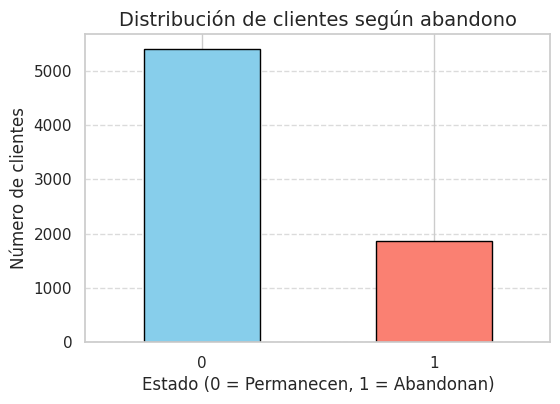

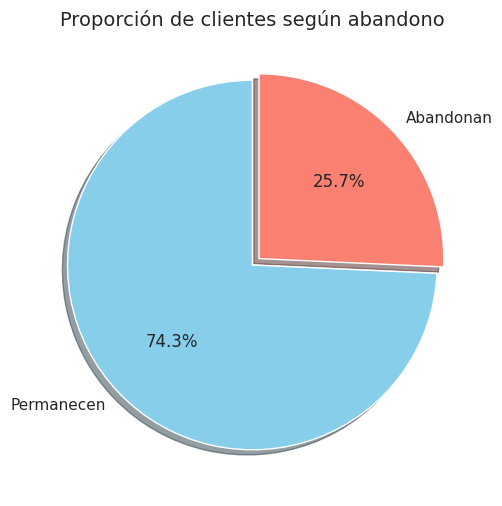

In [ ]:
import matplotlib.pyplot as plt

# --- Conteo de clientes por estado de abandono ---
conteo_abandono = df["abandono"].value_counts()
proporcion_abandono = df["abandono"].value_counts(normalize=True) * 100

# --- Gráfico de barras ---
plt.figure(figsize=(6,4))
conteo_abandono.plot(kind="bar", color=["skyblue", "salmon"], edgecolor="black")
plt.title("Distribución de clientes según abandono", fontsize=14)
plt.xlabel("Estado (0 = Permanecen, 1 = Abandonan)")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- Gráfico circular ---
plt.figure(figsize=(6,6))
plt.pie(conteo_abandono, labels=["Permanecen", "Abandonan"], autopct="%1.1f%%",
        startangle=90, colors=["skyblue", "salmon"], explode=(0,0.05), shadow=True)
plt.title("Proporción de clientes según abandono", fontsize=14)
plt.show()

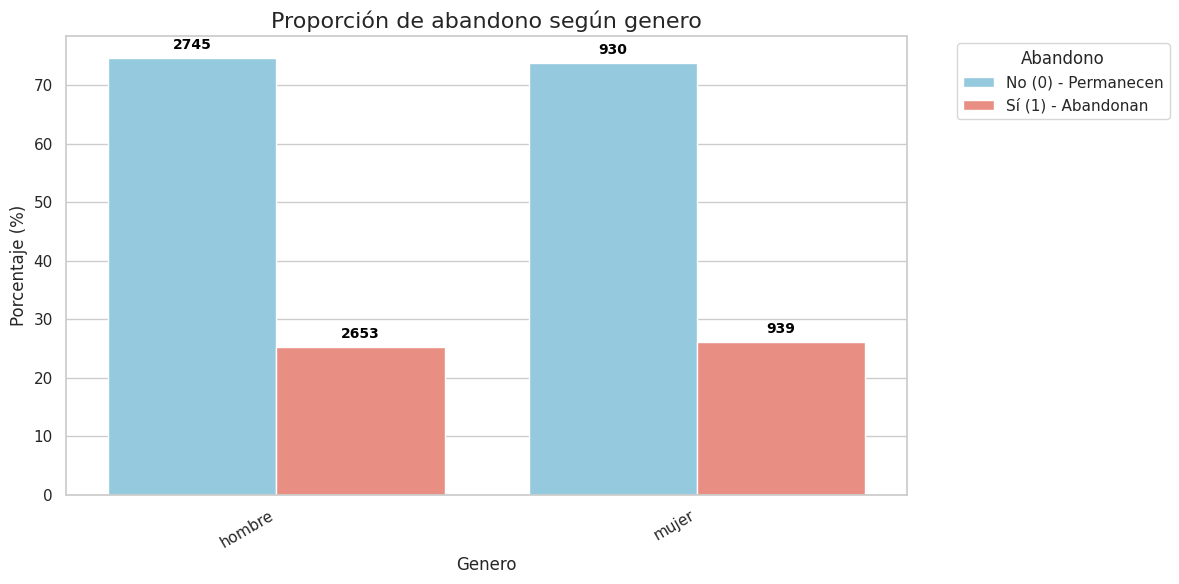

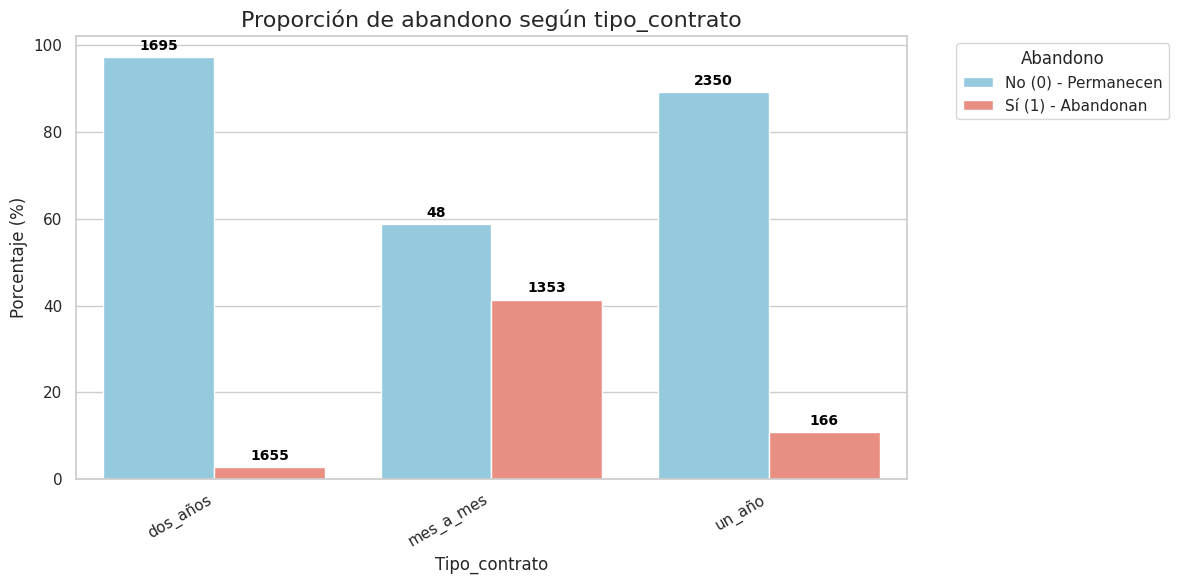

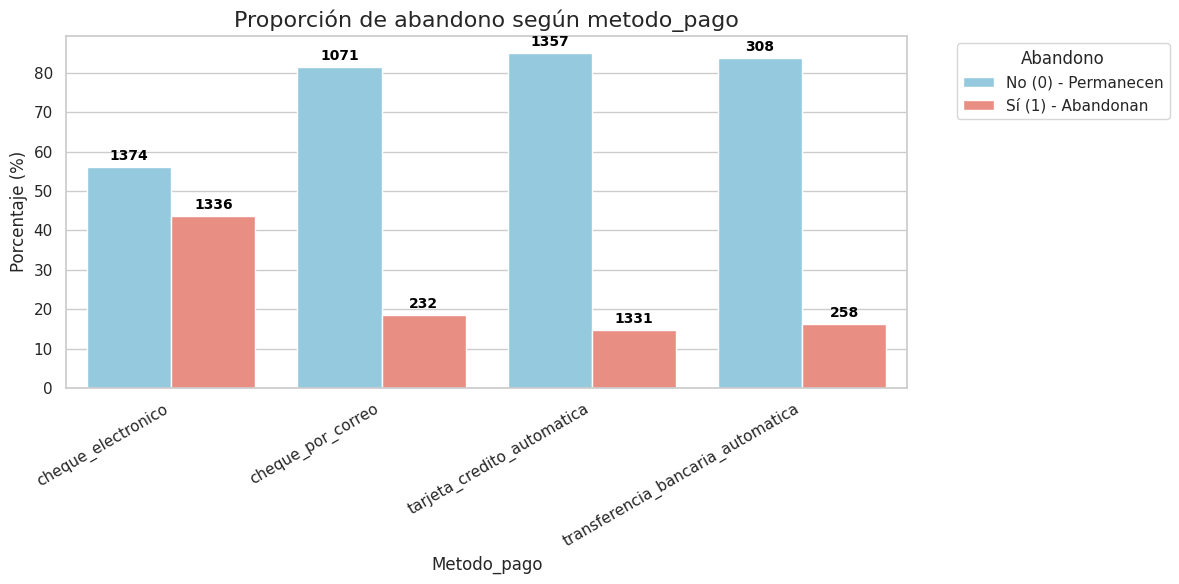

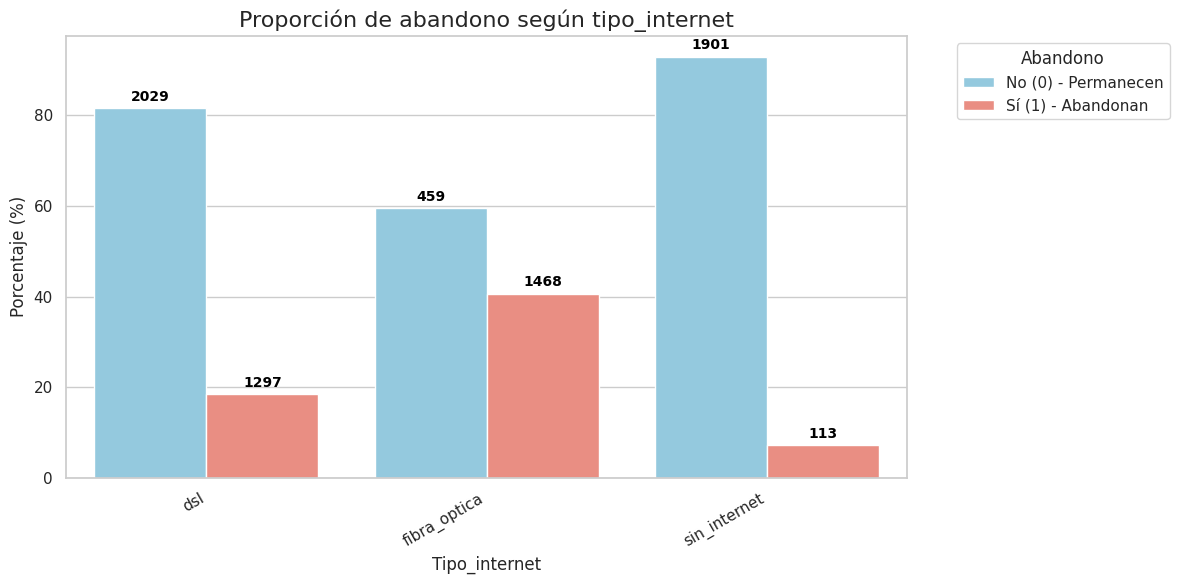

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas a analizar
variables_categoricas = ["genero", "tipo_contrato", "metodo_pago", "tipo_internet"]

sns.set(style="whitegrid", palette="pastel")

for var in variables_categoricas:
    plt.figure(figsize=(12,6))  # Más grande

    # --- Cálculo de proporciones ---
    prop = (
        df.groupby(var)["abandono"]
        .value_counts(normalize=True)
        .rename("proporcion")
        .mul(100)
        .reset_index()
    )

    # --- Cálculo de cuentas absolutas ---
    counts = (
        df.groupby(var)["abandono"]
        .value_counts()
        .rename("conteo")
        .reset_index()
    )

    # --- Merge ---
    data = prop.merge(counts, on=[var,"abandono"])

    # --- Gráfico ---
    ax = sns.barplot(
        data=data,
        x=var,
        y="proporcion",
        hue="abandono",
        palette={0:"skyblue", 1:"salmon"},
        dodge=True
    )

    # --- Etiquetas ARRIBA de cada barra ---
    for p, count in zip(ax.patches, data["conteo"]):
        ax.annotate(
            f"{count}",
            (p.get_x() + p.get_width() / 2., p.get_height() + 1),
            ha="center", va="bottom",
            fontsize=10, color="black", fontweight="bold"
        )

    # --- Ajustes de títulos y ejes ---
    plt.title(f"Proporción de abandono según {var}", fontsize=16)
    plt.ylabel("Porcentaje (%)", fontsize=12)
    plt.xlabel(var.capitalize(), fontsize=12)
    plt.xticks(rotation=30, ha="right", fontsize=11)

    # --- Leyenda afuera ---
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(
        handles,
        ["No (0) - Permanecen", "Sí (1) - Abandonan"],
        title="Abandono",
        bbox_to_anchor=(1.05, 1), loc="upper left"
    )

    plt.tight_layout()
    plt.show()

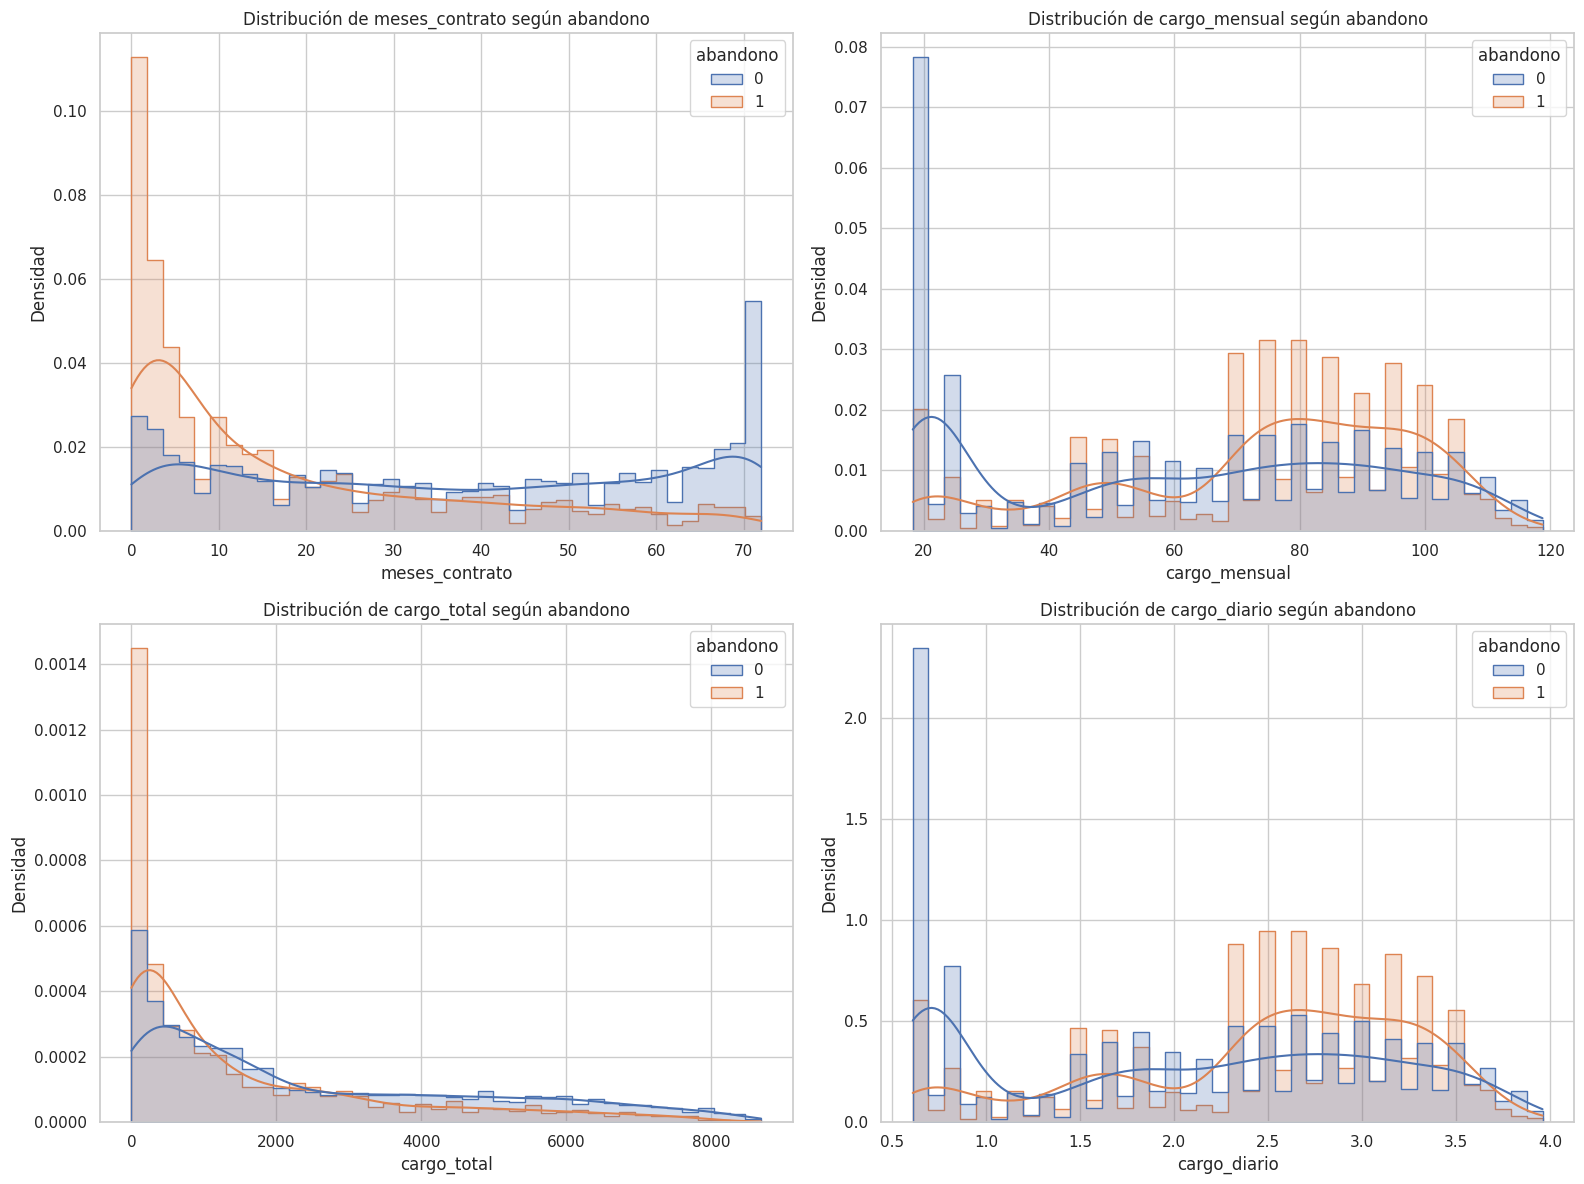

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las variables numéricas relevantes
variables_numericas = ["meses_contrato", "cargo_mensual", "cargo_total", "cargo_diario"]

# Crear los gráficos
plt.figure(figsize=(16, 12))

for i, var in enumerate(variables_numericas, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        data=df,
        x=var,
        hue="abandono",
        bins=40,
        kde=True,
        element="step",
        stat="density",
        common_norm=False
    )
    plt.title(f"Distribución de {var} según abandono")
    plt.xlabel(var)
    plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

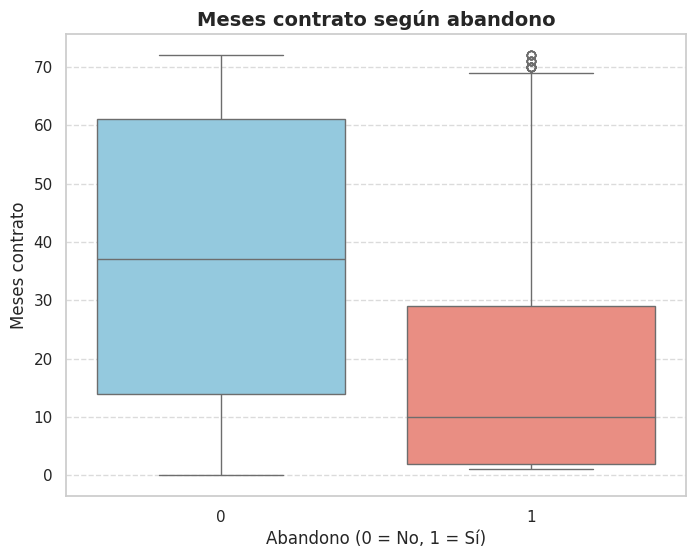

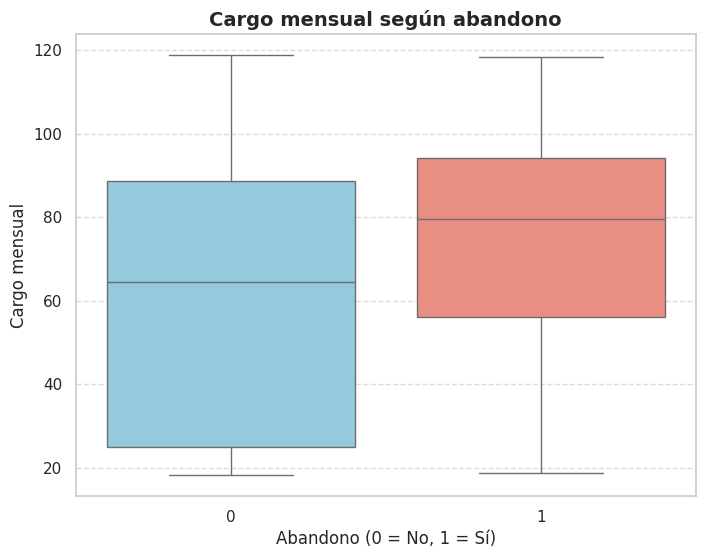

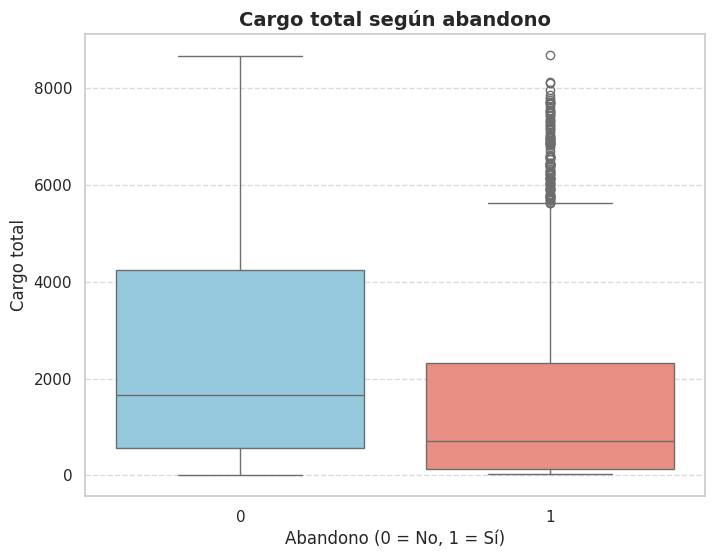

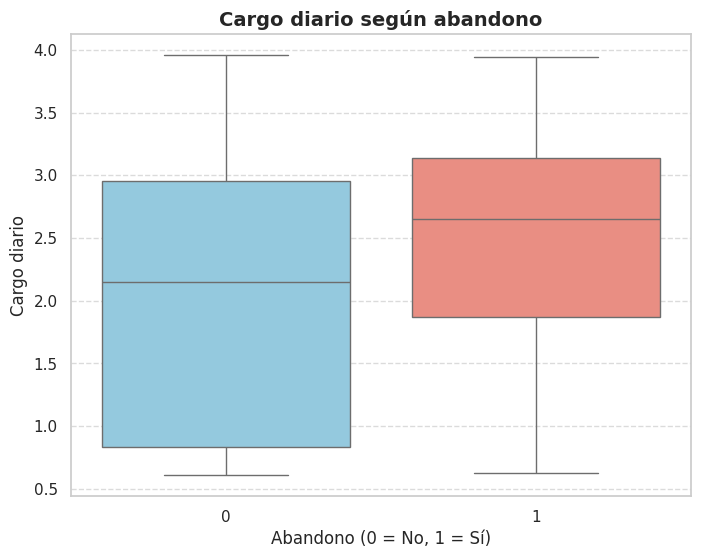

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a comparar contra evasión
variables_numericas = ["meses_contrato", "cargo_mensual", "cargo_total", "cargo_diario"]

sns.set(style="whitegrid", palette="Set2")

for var in variables_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        data=df,
        x="abandono",
        y=var,
        hue="abandono",  # para controlar los colores
        palette={0: "skyblue", 1: "salmon"},
        dodge=False,
        legend=False
    )

    plt.title(f"{var.replace('_',' ').capitalize()} según abandono", fontsize=14, weight="bold")
    plt.xlabel("Abandono (0 = No, 1 = Sí)", fontsize=12)
    plt.ylabel(var.replace("_", " ").capitalize(), fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

#📄Informe final

In [ ]:
# Este es el inicio del Informe Final

# Informe de Análisis de Abandono de Clientes (Churn) en TelecomX

**Para:** Dirección Ejecutiva de TelecomX

**De:** Héctor Cano | Científico de Datos

---

## 🔹 Introducción

El presente informe tiene como objetivo analizar el fenómeno del abandono de clientes (Churn) en TelecomX. La pérdida de clientes representa un desafío significativo para la rentabilidad y el crecimiento de la empresa. Mediante el análisis de los datos de nuestros clientes, buscamos identificar los factores clave que influyen en la decisión de un cliente de abandonar nuestro servicio, con el fin de desarrollar estrategias de retención más efectivas y proactivas.

## 🔹 Limpieza y Tratamiento de Datos

Se procesó un conjunto de datos de clientes de TelecomX, extraído de un archivo JSON. Los pasos clave incluyeron:

*   **Aplanamiento:** Se normalizaron las estructuras de datos anidadas para crear un conjunto de datos plano y fácil de manejar.
*   **Estandarización:** Se limpiaron y estandarizaron los valores de las variables categóricas (por ejemplo, convirtiendo a minúsculas y reemplazando espacios).
*   **Manejo de Valores Faltantes y Atípicos:** Se identificaron y trataron los valores faltantes en la variable objetivo 'abandono' y se manejaron los casos especiales en los cargos totales para clientes de recién ingreso.
*   **Transformación de Tipos de Datos:** Se convirtieron las columnas de cargos a formato numérico y se creó una nueva variable 'cargo_diario' para un análisis más granular.
*   **Homologación:** Se renombraron las columnas a español y se codificaron las variables binarias (Sí/No) como 1 y 0.

Estas acciones aseguraron la calidad y la estructura adecuada de los datos para el análisis posterior.

## 🔹 Análisis Exploratorio de Datos

El análisis exploratorio se centró en comprender la distribución de las variables y su relación con el abandono de clientes.

**Distribución del Abandono:**

La base de clientes muestra un **25.7% de tasa de abandono**. Esto indica que aproximadamente uno de cada cuatro clientes no permanece con TelecomX.

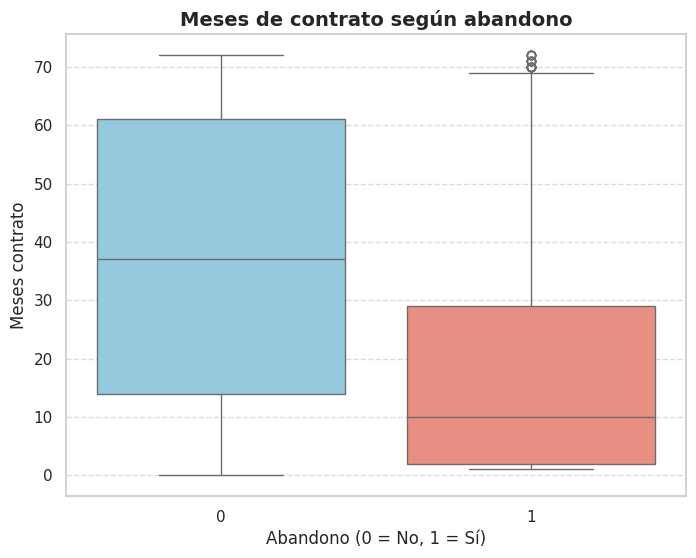

In [ ]:
# Mostrar boxplot de meses_contrato vs abandono
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="abandono",
    y="meses_contrato",
    hue="abandono",
    palette={0: "skyblue", 1: "salmon"},
    dodge=False,
    legend=False
)
plt.title("Meses de contrato según abandono", fontsize=14, weight="bold")
plt.xlabel("Abandono (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Meses contrato", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

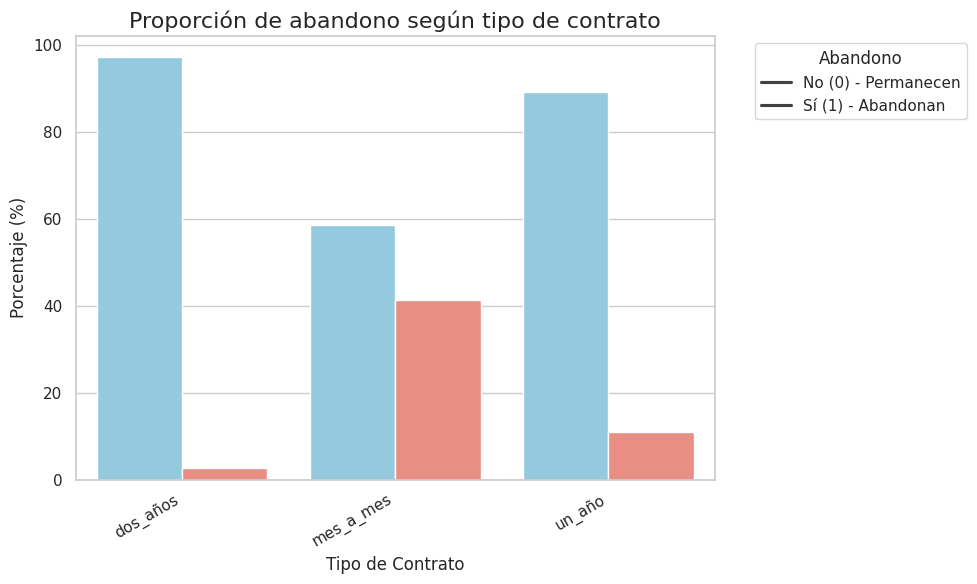

In [ ]:
# Mostrar gráfico de barras de tipo_contrato vs abandono
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
prop_contrato = (
    df.groupby("tipo_contrato")["abandono"]
    .value_counts(normalize=True)
    .rename("proporcion")
    .mul(100)
    .reset_index()
)
sns.barplot(
    data=prop_contrato,
    x="tipo_contrato",
    y="proporcion",
    hue="abandono",
    palette={0:"skyblue", 1:"salmon"},
    dodge=True
)
plt.title("Proporción de abandono según tipo de contrato", fontsize=16)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xlabel("Tipo de Contrato", fontsize=12)
plt.xticks(rotation=30, ha="right", fontsize=11)
plt.legend(title="Abandono", labels=["No (0) - Permanecen", "Sí (1) - Abandonan"], bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

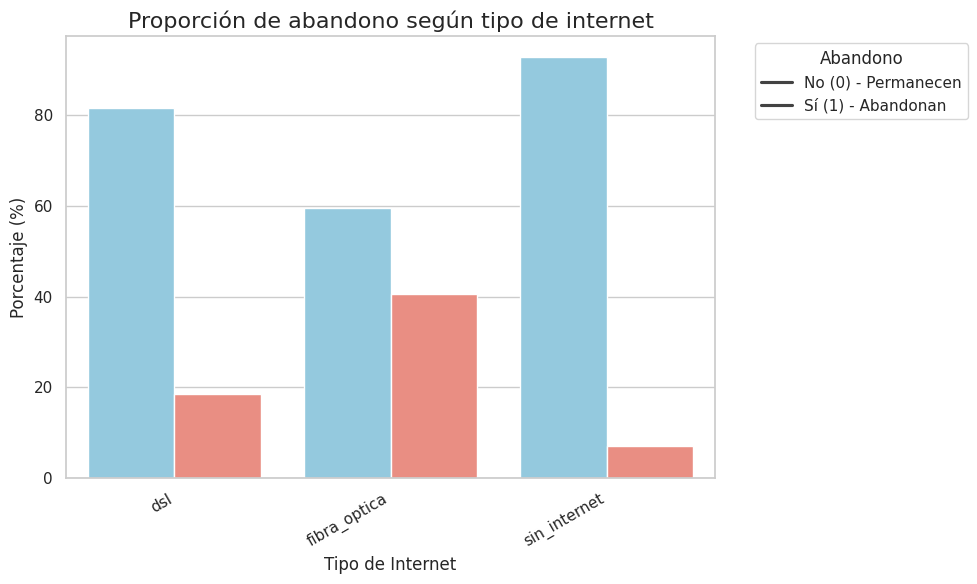

In [ ]:
# Mostrar gráfico de barras de tipo_internet vs abandono
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
prop_internet = (
    df.groupby("tipo_internet")["abandono"]
    .value_counts(normalize=True)
    .rename("proporcion")
    .mul(100)
    .reset_index()
)
sns.barplot(
    data=prop_internet,
    x="tipo_internet",
    y="proporcion",
    hue="abandono",
    palette={0:"skyblue", 1:"salmon"},
    dodge=True
)
plt.title("Proporción de abandono según tipo de internet", fontsize=16)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xlabel("Tipo de Internet", fontsize=12)
plt.xticks(rotation=30, ha="right", fontsize=11)
plt.legend(title="Abandono", labels=["No (0) - Permanecen", "Sí (1) - Abandonan"], bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

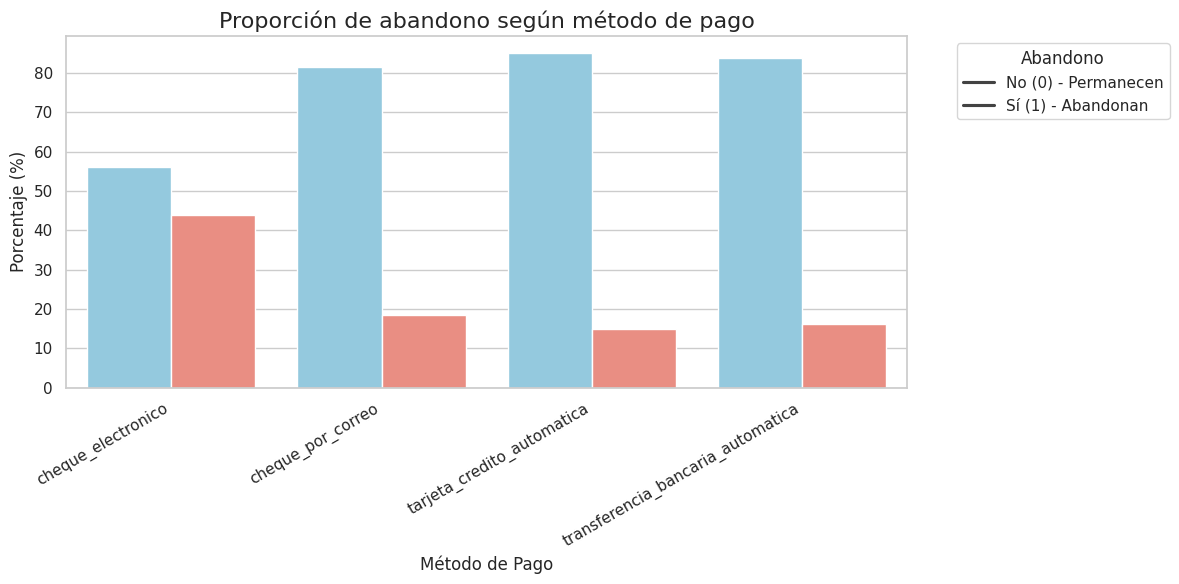

In [ ]:
# Mostrar gráfico de barras de metodo_pago vs abandono
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
prop_pago = (
    df.groupby("metodo_pago")["abandono"]
    .value_counts(normalize=True)
    .rename("proporcion")
    .mul(100)
    .reset_index()
)
sns.barplot(
    data=prop_pago,
    x="metodo_pago",
    y="proporcion",
    hue="abandono",
    palette={0:"skyblue", 1:"salmon"},
    dodge=True
)
plt.title("Proporción de abandono según método de pago", fontsize=16)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xlabel("Método de Pago", fontsize=12)
plt.xticks(rotation=30, ha="right", fontsize=11)
plt.legend(title="Abandono", labels=["No (0) - Permanecen", "Sí (1) - Abandonan"], bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

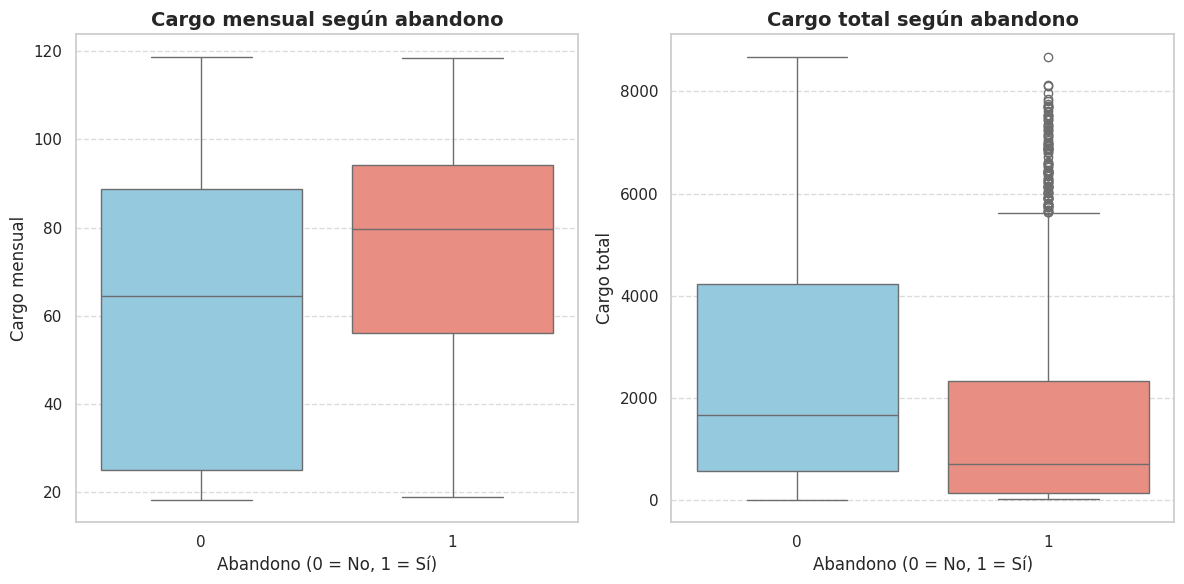

In [ ]:
# Mostrar boxplots de cargos vs abandono
import matplotlib.pyplot as plt
import seaborn as sns

variables_cargos = ["cargo_mensual", "cargo_total"]
plt.figure(figsize=(12, 6))

for i, var in enumerate(variables_cargos, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(
        data=df,
        x="abandono",
        y=var,
        hue="abandono",
        palette={0: "skyblue", 1: "salmon"},
        dodge=False,
        legend=False
    )
    plt.title(f"{var.replace('_',' ').capitalize()} según abandono", fontsize=14, weight="bold")
    plt.xlabel("Abandono (0 = No, 1 = Sí)", fontsize=12)
    plt.ylabel(var.replace("_", " ").capitalize(), fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

## 🔹 Hallazgos Clave

El análisis exploratorio de los datos nos ha permitido identificar patrones y relaciones importantes que contribuyen al abandono de clientes.

**Distribución del Abandono:**

La base de clientes de TelecomX muestra una tasa de abandono del **25.7%**. Esto significa que aproximadamente uno de cada cuatro clientes no continúa con nuestros servicios, lo que subraya la importancia de comprender las causas de esta pérdida.

**Variables Clave Relacionadas con el Abandono:**

Se ha observado que ciertas características y comportamientos de los clientes están fuertemente asociados con el abandono:

*   **Antigüedad del Cliente (meses_contrato):** Como se muestra en el boxplot a continuación, los clientes que abandonan tienen una antigüedad significativamente menor en comparación con aquellos que permanecen. La mediana de meses de contrato para los clientes que abandonan es mucho más baja. Esto indica que los primeros meses de servicio son críticos para la retención.

*   **Tipo de Contrato (tipo_contrato):** El tipo de contrato es un predictor muy fuerte de abandono. El gráfico de barras muestra que los clientes con contratos **"mes a mes"** tienen una tasa de abandono drásticamente más alta (alrededor del 41%) en comparación con los contratos de "un año" (aproximadamente 11%) y "dos años" (aproximadamente 3%). Esto sugiere que los contratos a largo plazo fomentan la lealtad del cliente.

*   **Tipo de Internet (tipo_internet):** Los clientes con servicio de **"fibra óptica"** presentan una tasa de abandono considerablemente mayor (alrededor del 40%) en comparación con los que tienen servicio "dsl" (aproximadamente 18%) o "sin internet" (aproximadamente 7%). Esto podría indicar problemas de calidad o expectativas no cumplidas con el servicio de fibra óptica.

*   **Método de Pago (metodo_pago):** El método de pago **"cheque electrónico"** está asociado con una mayor tasa de abandono (alrededor del 44%) en comparación con otros métodos como el cheque por correo, la transferencia bancaria automática o la tarjeta de crédito automática. Esto podría reflejar una menor automatización o compromiso con el servicio.

*   **Cargos Mensuales y Totales (cargo_mensual, cargo_total):** Los boxplots de cargos mensuales y totales revelan que los clientes que abandonan tienden a tener **cargos mensuales más altos** y, debido a su menor antigüedad, **cargos totales más bajos** en comparación con los clientes que permanecen. Esto sugiere que los clientes con servicios más caros son más propensos a irse, especialmente si son nuevos.

**Otras Variables Binarias:**

El análisis de variables binarias como **seguridad_en_línea**, **respaldo_en_linea**, **proteccion_dispositivo**, **soporte_tecnico**, **tv_streaming** y **peliculas_streaming** también mostró diferencias en las tasas de abandono. En general, los clientes que no tienen estos servicios adicionales (indicado por 0 en las visualizaciones descriptivas) tienden a tener tasas de abandono más altas que aquellos que sí los tienen (indicado por 1), lo que sugiere que los servicios complementarios pueden contribuir a la retención.

## 🔹 Conclusiones e Insights

El análisis de datos ha revelado que el abandono de clientes en TelecomX no está relacionado con un único factor, sino con una combinación de características demográficas, servicios contratados y comportamientos de pago. Los clientes con **menor antigüedad**, **contratos "mes a mes"**, servicio de **"fibra óptica"**, que pagan con **"cheque electrónico"** y que tienen **cargos mensuales más altos** son los que presentan un mayor riesgo de abandono. La ausencia de servicios de valor añadido también parece influir negativamente en la retención.

Estos hallazgos son cruciales para entender quiénes son nuestros clientes más propensos a abandonar y por qué. Nos permiten pasar de una reacción al abandono a una estrategia proactiva de retención.

## 🔹 Recomendaciones Estratégicas

Basado en los insights obtenidos del análisis, se proponen las siguientes recomendaciones estratégicas para la Dirección Ejecutiva:

1.  **Foco en la Integración de Nuevos Clientes:** Implementar programas de bienvenida y seguimiento intensivo durante los primeros meses de servicio, especialmente para clientes con contratos mes a mes.
2.  **Incentivar Contratos a Largo Plazo:** Ofrecer incentivos atractivos para que los clientes opten por contratos de uno o dos años.
3.  **Mejorar la Experiencia del Cliente de Fibra Óptica:** Investigar y abordar las posibles causas de insatisfacción entre los clientes de fibra óptica, ya sean problemas técnicos, de servicio al cliente o de relación precio-valor.
4.  **Promover Métodos de Pago Automáticos:** Incentivar el uso de transferencias bancarias automáticas o tarjetas de crédito automáticas, quizás ofreciendo pequeños descuentos o beneficios a los clientes que cambien su método de pago.
5.  **Paquetes y Promoción de Servicios Adicionales:** Destacar los beneficios de los servicios de seguridad en línea, respaldo, protección de dispositivos, soporte técnico y streaming para fomentar su adopción y, potencialmente, mejorar la retención.
6.  **Desarrollo de un Modelo Predictivo de Churn:** Utilizar este análisis como base para construir un modelo que identifique a los clientes con alto riesgo de abandono en tiempo real, permitiendo intervenciones personalizadas y oportunas por parte de los equipos de marketing y atención al cliente.

La implementación de estas recomendaciones, respaldada por un monitoreo continuo y análisis más profundos, puede tener un impacto significativo en la reducción de la tasa de abandono y en la mejora de la rentabilidad de TelecomX.